# PSF calculation with Poppy

## Goal simulate effect of gratings including hologram on. the PSF including the orders 0,1,2 of diffraction and understand Fourier optics
- author : Sylvie Dagoret-Campagne
- aflilation IJCLab/IN2P3/CNRS
- creation date 2025-01-10
- last update : 2025-01-11
- conda environnement : poppy_conda_py312 (on my macbook)
- install poppy : https://poppy-optics.readthedocs.io/en/latest/
- install rise in jupyterlab to see the slides : https://github.com/jupyterlab-contrib/rise
- install pandoc for documentation

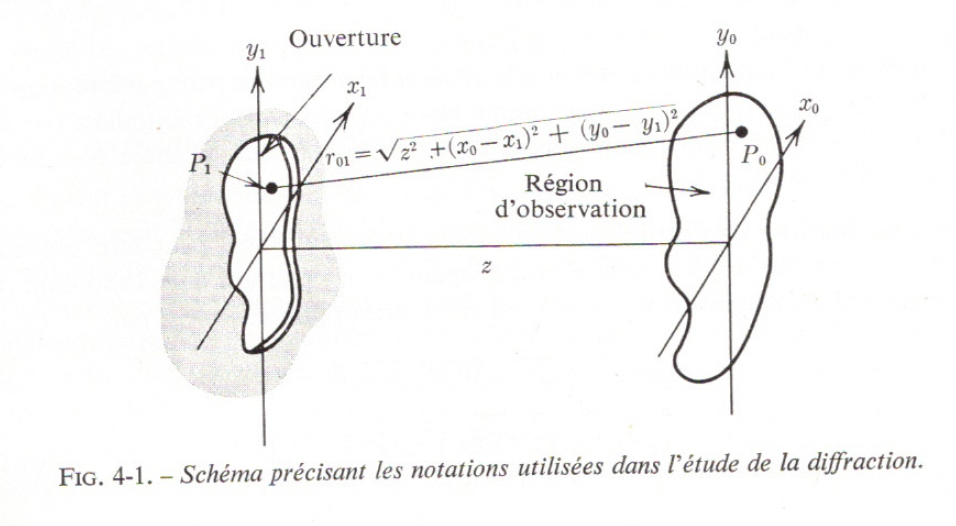

In [1]:
from IPython.display import Image
Image(filename = "Figs/fig_aperturediffraction.png",width=500,height=100)

## Reminder of Diffraction by an aperture $(x_1,y_1)$ seen on a screen at $(x_0,y_0)$ 
(Goodmann book on Fourier optics)
- in Fresnel approximation (spherical wave $\rightarrow$ quadratic terms in propagation term $\frac{e^{ikr_{01}}}{j\lambda z}$~:$z^3 \gg \frac{\pi}{4\lambda}\left( (x_0-x_1)^2 + (y_0-y_1)^2 \right)^2|_{max} $:
$$
U(x_0,y_0) = \frac{exp(jkz)}{jkz} \exp\left(j \frac{k}{2z}(x_0^2+y_0^2) \right) \int \int \left\{ U(x_1,y_1) \exp\left(  j \frac{k}{2z}(x_1^2+y_1^2)\right)\right\} \times \exp \left\{ -j \frac{2 \pi}{\lambda z}(x_0x_1+y_0y_1)
\right\}dx_1 dy_1
$$
- in Fraunhoffer approximation $ z \gg \frac{k(x_1^2+y_1^2)}{2}|_{max}$:
$$
U(x_0,y_0) = \frac{exp(jkz)}{jkz} \exp\left(j \frac{k}{2z}(x_0^2+y_0^2) \right) \int \int  U(x_1,y_1)  \times \exp \left\{ -j \frac{2 \pi}{\lambda z}(x_0x_1+y_0y_1)
\right\}dx_1 dy_1
$$
- The Fraunoffer approximation solution is proportional to the Fourier transform of $U(x_1,y_1)$ at frequency $(f_X,f_Y) = (\frac{x_0}{\lambda z}, \frac{y_0}{\lambda z}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- The Fresnel pproximation solution is proportional to the Fourier transform of $\left \{ U(x_1,y_1) \cdot \exp\left(  j \frac{k}{2z}(x_1^2+y_1^2)\right) \right\}$ at frequency $(f_X,f_Y) = (\frac{x_0}{\lambda z}, \frac{y_0}{\lambda z}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- $(\alpha,\beta))$ incident angles in $(X-Z,Y-Z)$ planes

## Transform the parallel beam into a converging beam

- thin lens of focal length $\phi$ with a transmission function (depending on lens depth $\Delta_0$ and refractive index $n$):
$$
U_l(x,y) = \exp(j k\Delta_0 n) \cdot \exp(-j \frac{k}{2\phi}(x^2+y^2))
$$
- When a lens (or mirror) transform a parallel beam into a converging beam at the location of an object and have a screen at the focal plane, the $\exp \left(j \frac{k}{2z}(x_1^2+y_1^2 \right)$ is compensated by the lens term $\exp(-j \frac{k}{2\phi}(x^2+y^2))$
- Thus a  converging lens (or mirror) transform a parallel beam Fresnel diffraction into a Fraunhoffer diffraction, provided $z=\phi$.
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int U(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$

### The pupil function of the lens
$$
P(x,y) = \left\{ \begin{array}{c} 1 \;\; r < D/2 \\ 0 \;\;r > D/2 \end{array} \right.
$$

where $r=\sqrt{x^2+y^2}$ and $D$ is the lens diameter.

## Diffraction by an object close to the lens

- $t(x,y)$ transmission of the object
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int U(x,y) \cdot  t(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$

- For an incident plane wave $U(x,y)=1$ :
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int   t(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$
- $U(x_\phi,y_\phi)$ (at focal plane) is the Fourier transform of the object transmission $t(x,y)$  at frequency $(F_X,F_Y) = (\frac{x_\phi}{\lambda \phi},\frac{y_\phi}{\lambda \phi}) = (\frac{\alpha_\phi}{\lambda },\frac{\beta_\phi}{\lambda})$
- As one move along different angles in focal plane, one access to different frequency components at fixed $\lambda$.

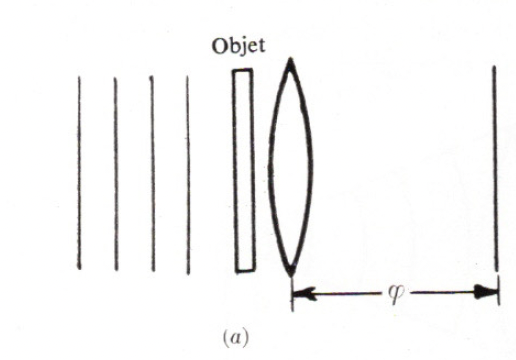

In [2]:
Image(filename = "Figs/fig_lensobjdiffraction.png",width=500,height=100)

## Object behind the lens

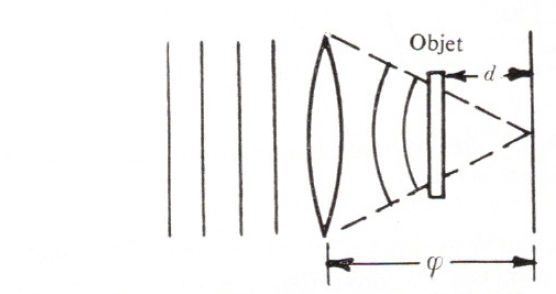

In [3]:
Image(filename = "Figs/fig_objbehindlensdiffraction.png",width=500,height=100)

$$
U_\phi(x_\phi,y_\phi) = \frac{A \exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} \int \int t_0(x,y) P(x \frac{\phi}{d}, y\frac{\phi}{d}) \times \exp \left\{ -j \frac{2 \pi}{\lambda d}(x x_\phi+ y y_\phi) \right\} dx dy
$$

- Note the $\phi$ is replaced by the $d$
- $P(x,y)$ pupil function of the lens such that $P(x \frac{\phi}{d}, y\frac{\phi}{d})$ constrains to the focused beam size at object position
- $U_\phi(x_\phi,y_\phi)$ is proportional to the Fourier transform of $t_0(x,y) P(x \frac{\phi}{d}, y\frac{\phi}{d})$ at frequency $(f_X,f_Y) = (\frac{x_\phi}{\lambda d}, \frac{y_\phi}{\lambda d}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- $(\alpha,\beta))$ incident angles in $(X-Z,Y-Z)$ planes

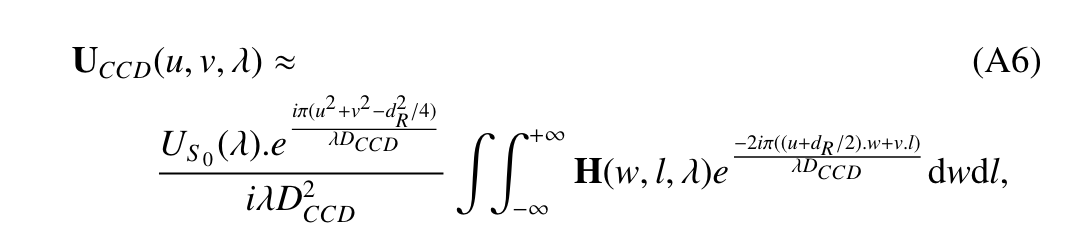

In [4]:
Image(filename = "Figs/fig_holo_udiffformula.png",width=500,height=100)

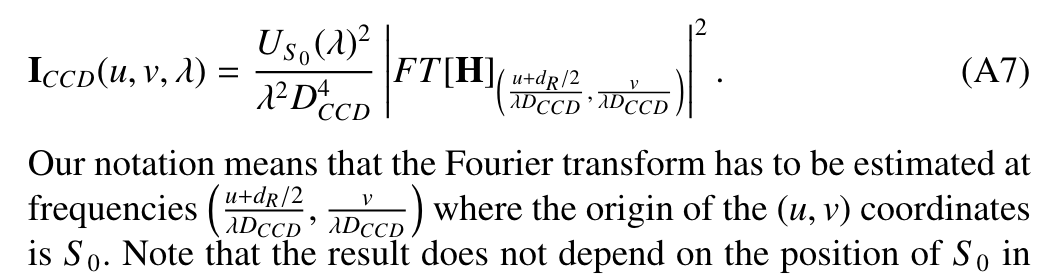

In [5]:
Image(filename = "Figs/fig_holo_idiffformula.png",width=500,height=100)

## Summary

### Define the Fourier Transform

$$
{\cal F_t}(x_z,y_z,z,\lambda) =\int \int t(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda z}(x x_z+y y_z)\right\} dx dy
$$

#### Fourier transform as Frequency (inverse of length)

$$
{\cal H_t}(F_x,F_y) =\int \int t(x,y) \times \exp 
\left\{ -j 2 \pi(F_x\cdot x+ F_y \cdot y)\right\} dx dy
$$
- when the lens and the object are closeby : $F_x = \frac{x_z}{\lambda z}, \; F_y = \frac{x_y}{\lambda z}$ where $z=\phi$
- when the object is behind the lens : $F_x = \frac{x_z}{\lambda z}, \; F_y = \frac{x_y}{\lambda z}$ where $z=d$

### a) Diffraction of an aperture in a converging beam at Focal Plane
L'amplitude dans le plan focal est :
$$
U_a(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) 
{\cal F}_P(x_\phi,y_\phi,\phi,\lambda)
$$
$$
U_a(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) 
{\cal H}_P(F_x=\frac{x_\phi}{\lambda \phi},F_y=\frac{y_\phi}{\lambda \phi})
$$

- Note $U_a$ can be reexpressed as a function of directions of incident angles on focal plane ( $\alpha_\phi \simeq \frac{x_\phi}{\phi}$, $\beta_\phi \simeq \frac{y_\phi}{\phi}$) as follow:
$$
U_a(\alpha_\phi,\beta_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) 
{\cal H}_P(F_x=\frac{\alpha_\phi}{\lambda},F_y=\frac{\beta_\phi}{\lambda})
$$

### b) Diffraction by an object of transmission in the beam at distance d from CCD 
L'amplitude dans le plan focal
$$
U_b(x_\phi,y_\phi) = \frac{\exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} {\cal F}_{Pt}(x_\phi,y_\phi,d,\lambda)
$$

$$
U_b(x_\phi,y_\phi) = \frac{\exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} {\cal H}_{Pt}(F_x=\frac{x_\phi}{\lambda d},F_y=\frac{y_\phi}{\lambda d})
$$ 

- Note $U_b$ can be reexpressed as a function of directions of incident angles on focal plane ( $\alpha_d\simeq \frac{x_\phi}{d}$, $\beta_d \simeq \frac{y_\phi}{d}$) as follow:
$$
U_a(\alpha_d,\beta_d) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) 
{\cal H}_P(F_x=\frac{\alpha_d}{\lambda},F_y=\frac{\beta_d}{\lambda})
$$
- where the angles $(\alpha_d, \beta_d)$ are also scaled by homothetie by a factor $\frac{\phi}{d}$:
$$
\begin{array}{ccc}
\alpha_d & = & \frac{\phi}{d}\alpha_\phi \\
\beta_d & = & \frac{\phi}{d}\beta_\phi 
\end{array}
$$
- but these angles have no meaning of physical interest as we don't use the object position as an origin.

Poppy compute the Fourier transform of an aperture plane where is placed the object to be diffracted at the focal plane when it is assumed the Fraunhofer approximation.

- When the diffractive object is at a distance $d$ from focal plane, the amplitude at focal plane $U_b(x_\phi,y_\phi)$ is the one of $U_a(x_\phi^\prime,y_\phi^\prime)$ shifted by a factor $\frac{\phi}{d}$ par homothetie:
$$
U_b(x_\phi,y_\phi) \simeq U_a(x_\phi\frac{\phi}{d},y_\phi \frac{\phi}{d})
$$
- The amplitude pattern for the case b) at  $(x_\phi^b,y_\phi^b)$ is the one obtained in the case a) at $(x_\phi^a=x_\phi^b\frac{\phi}{d},y_\phi^a = y_\phi^b \frac{\phi}{d})$, thus in the spatial frequency regions scaled up by a factor $\frac{\phi}{d}$.
- Conversely the amplitude pattern for the case a) at  $(x_\phi^a,y_\phi^a)$ is the one obtained in the case b) at $(x_\phi^b=x_\phi^a\frac{d}{\phi},y_\phi^b = y_\phi^a \frac{d}{\phi})$, thus in the spatial frequency regions scaled down by a factor $\frac{d}{\phi}$.
- Example if we expect the diffraction angle for order 1 at $\theta_1^a$ in case a) such $x_\phi^a(\theta_1) \simeq \lambda Neff \phi$, we expect this order 1 at $\theta_1^b$ in case b) such $x_\phi^b(\theta_1) \simeq \frac{d}{\phi}\lambda Neff \phi = d \lambda Neff$.

### Déflexion et position des ordres dans le plan focal
L'angle de déflexion pour l'ordre $n$ est le même dans les deux cas a) et b):
$$
\theta_n = \arcsin(n \lambda/a)
$$
Pour le cas a) la position de l'ordre $n$ est :
$$
x_\phi(a) = \phi \tan(\theta_n)
$$
Pour le cas a) la position de l'ordre $n$ est :
$$
x_\phi(b) = d \tan(\theta_n)
$$
Donc on a bien
$$
x_\phi(b) = \frac{d}{\phi} x_\phi(a) 
$$

## Poppy Diffraction example

- Use Auxtel aperture telescope

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u
poppy.__version__

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['axes.titlesize'] =  20
mpl.rcParams['axes.labelsize'] =  16
mpl.rcParams['lines.markersize'] =  10
mpl.rcParams['xtick.labelsize'] =  12
mpl.rcParams['ytick.labelsize'] = 12


In [7]:
import logging
#logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

#### Auxtel configuration

In [8]:
# wavelength in m
wl = 0.5e-6
# pixel scale
# 10 microns pixel , 105 microns per arcsec
pix_size_mm = 10e-3
pix_scale = 10.0/105.0 # arcsec per pixel
fov_arcsec = 5.0 # must restrict the FOV in focl plane to avoid aliasing
# diameter in m
D = 1.2
Fnum = 18
# focal length
FL = D*Fnum
# Dccd
Dccd = 180e-3
# beam radius at object positon
beam_radius = D/2/FL*Dccd
# Position orders
Neff= 150. # number of lines per mm
Neffperm = Neff*1000
theta_1 = np.arcsin(wl*Neffperm)*u.rad
theta_1_arcsec = (theta_1/u.arcsec).decompose()
theta_1_arcmin = (theta_1/u.arcmin).decompose()

In [9]:
print(f"pixel_scale = {pix_scale:.4f} arcsec")
print(f"diffraction angle of order 1 theta_1 = {theta_1_arcsec} arcsec or {theta_1_arcmin } arcmin")

pixel_scale = 0.0952 arcsec
diffraction angle of order 1 theta_1 = 15484.400296813314 arcsec or 258.0733382802219 arcmin


In the case of Poppy, we can only calculate the diffraction pattern in the case a) where the object is next to the lens. It means the order 1 is very far

In [10]:
# we must calculate the popy diffraction pattern in the case a
shift_x_mm = np.tan(theta_1)*FL*1000
shift_x_pix = shift_x_mm/pix_size_mm 
shift_x_arcsec = shift_x_pix * pix_scale
print(f"order 1 shift in pixel {shift_x_pix}") 
print(f"order 1 shift in arcsec {shift_x_arcsec}") 

order 1 shift in pixel 162457.55622270366
order 1 shift in arcsec 15472.148211686062


In [11]:
# offset of orders
offset_order1_x = shift_x_arcsec 
offset_order1_y = 0

### Auxtel telescope Aperture definition

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Computing amplitude for Circle, radius=0.6 m sampled onto 8192 pixel grid with pixelscale 0.00021972656249999998 m / pix
INFO:poppy:Computing both for Circle, radius=0.6 m sampled onto 512 pixel grid with pixelscale 0.0035156249999999997 m / pix


(<Axes: title={'center': 'Transmittance for Circle, radius=0.6 m'}, ylabel='[meters]'>,
 <Axes: title={'center': 'OPD for Circle, radius=0.6 m'}>)

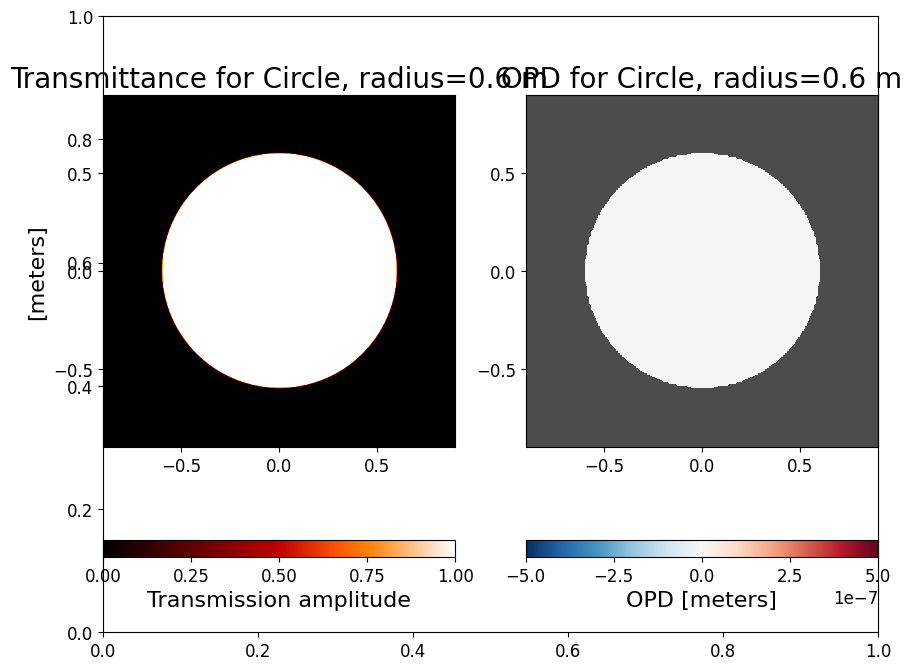

In [12]:
# number of bins
#Nb = 5120
#Nb = 4096
#Nb= 6144
Nb = 8192
oversampling=20
osys = poppy.OpticalSystem(oversample=oversampling)
ap = poppy.CircularAperture(radius=D/2.)
values = ap.sample(npix = Nb) 

fig,ax = plt.subplots(1,1,figsize=(10,8)) 
ap.display(colorbar=True,what='both',ax=ax)

### Add a detector plane and show the PSF

INFO:poppy:Added pupil plane: Circle, radius=0.6 m
INFO:poppy:Added detector with pixelscale=0.09523809523809523 and oversampling=20: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5e-07 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
INFO:poppy:  Calculation completed in 0.088 s
INFO:poppy:PSF Calculation completed.


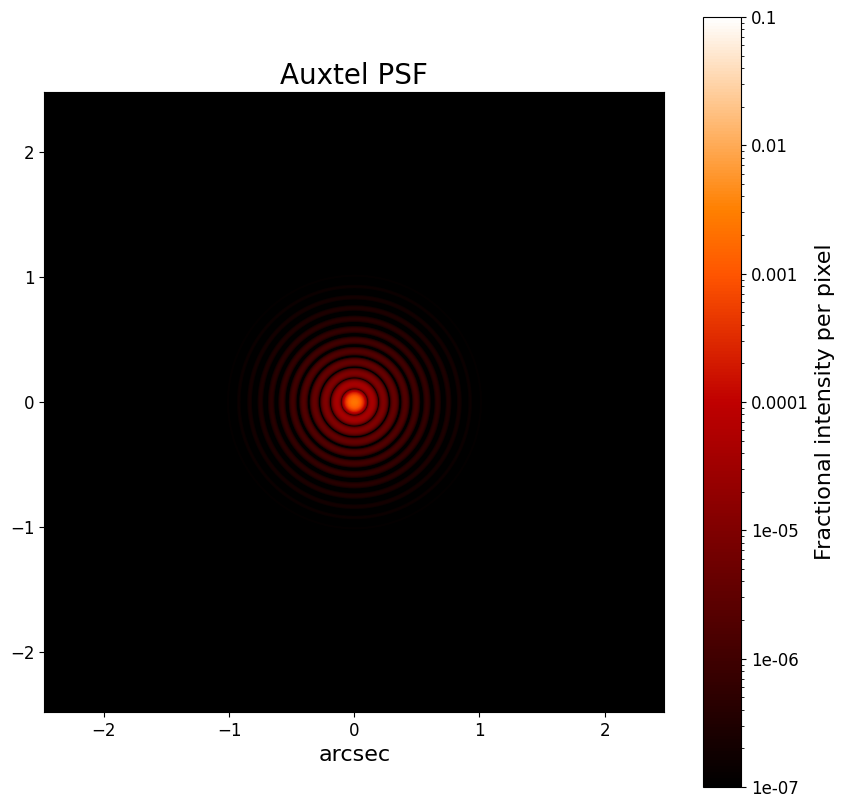

In [13]:
 # evaluate on 1024 x 1024 grid
osys.add_pupil(ap)    # pupil radius in meters
osys.add_detector(pixelscale=pix_scale, fov_arcsec=fov_arcsec)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wl,display_intermediates=False)   # wavelength in microns
fig,ax = plt.subplots(1,1,figsize=(10,10)) 
poppy.display_psf(psf, title='Auxtel PSF',ax=ax) 
plt.savefig('example_airy.png', dpi=100)

In [14]:
psf[0].data.shape

(1040, 1040)

In [15]:
fov_arcsec/pix_scale

52.5

### Fast Fourier transform

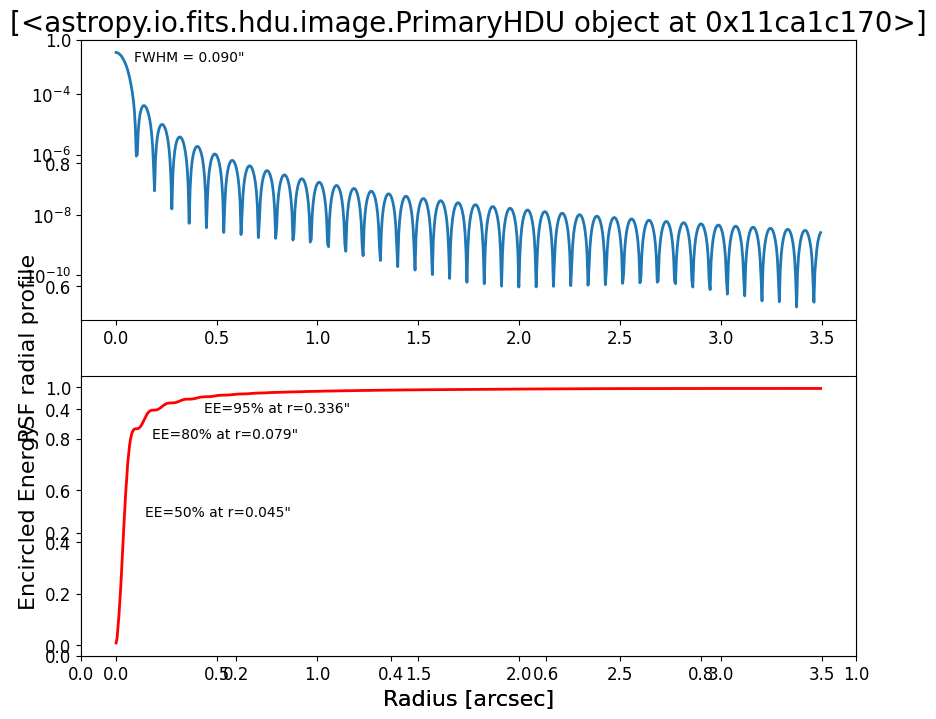

In [16]:
plt.figure(figsize=(10,8))
poppy.display_profiles(psf)

## Simple Ronchi pattern

In [17]:
def pupil_function(x,y,D=D,fl=FL,d=Dccd):
    """
    Size of the Beam at Optical element position
    """

    R = np.sqrt(x**2+y**2)*fl/d
    value = np.where(R<D/2.,1,0)
    return value

In [18]:
nx, ny = (500, 500)
x = np.linspace(-0.01,0.01 ,nx)
y = np.linspace(-0.01,0.01, ny)
xv, yv = np.meshgrid(x, y)
z = pupil_function(xv,yv)

Text(0.5, 1.0, 'pupil function at object position')

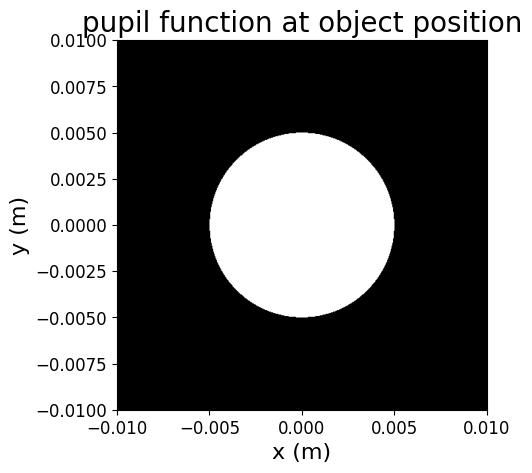

In [19]:
fig,ax = plt.subplots(1,1)
ax.imshow(z,extent=[x.min(),x.max(),y.min(),y.max()],cmap="gray")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("pupil function at object position")

In [20]:
def set_ronchi_transmission_debug(x,opticalelement_nblines_permm=150):
    """
    Generate a square pattern of transmission.
    x in mm
    """
    a = 1/opticalelement_nblines_permm
    return np.rint(x/a-0.25 - np.floor(x/a-0.25))

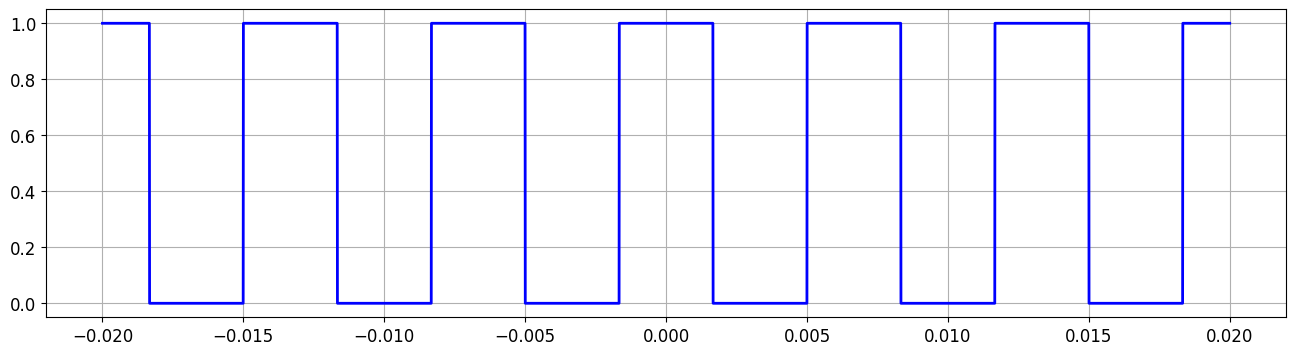

In [21]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
x = np.linspace(-0.02,0.02,5000)
y = set_ronchi_transmission_debug(x)
ax.plot(x,y,'b-')
ax.grid()

In [22]:
def set_ronchi_transmission(x,y,wl,opticalelement):
    """
    """
    nblines_perm = opticalelement.nblines_permm*1000.
    a = 1/nblines_perm 
    #pupil = pupil_function(x,y)
    # the aperture stop must be defined before the the optical element
    return np.rint(x/a-0.25 - np.floor(x/a-0.25))

In [23]:
def set_ronchi_opd(x,y,wl,opticalelement):
    """
    """
    return 0

In [24]:
class myRonchiGratingOptic(poppy.AnalyticOpticalElement):
    def __init__(self, *args, **kwargs):
        """ If your optic has adjustable parameters, then save them as attributes here """
        super().__init__(**kwargs)
        # number of line per mm
        self.nblines_permm = Neff 
    def get_opd(self,wave):
        y, x = self.get_coordinates(wave)
        opd = set_ronchi_opd(x,y, wave.wavelength, self)
        return opd

    def set_transmission(self, wave):
        y, x = self.get_coordinates(wave)
        transmission = set_ronchi_transmission(x,y, wave.wavelength, self)
        return transmission

    # behind the scenes poppy  will calculate:
    #    phasor = transmission = np.exp(1.j * 2 * np.pi / wave.wavelength * op

In [25]:
myoptic = myRonchiGratingOptic(oversample=10)
values = myoptic.sample(npix=Nb)  

INFO:poppy:Computing amplitude for unnamed optic sampled onto 8192 pixel grid with pixelscale 0.0001220703125 m / pix


INFO:poppy:Initialized OpticalSystem: Auxtel + Ronchi - Order 0
INFO:poppy:Computing amplitude for Circle, radius=0.005 m sampled onto 8192 pixel grid with pixelscale 1.8310546875e-06 m / pix
INFO:poppy:Added pupil plane: Circle, radius=0.005 m
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added detector with pixelscale=0.09523809523809523 and oversampling=1: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5e-07 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
INFO:poppy:  Calculation completed in 0.255 s
INFO:poppy:PSF Calculation completed.


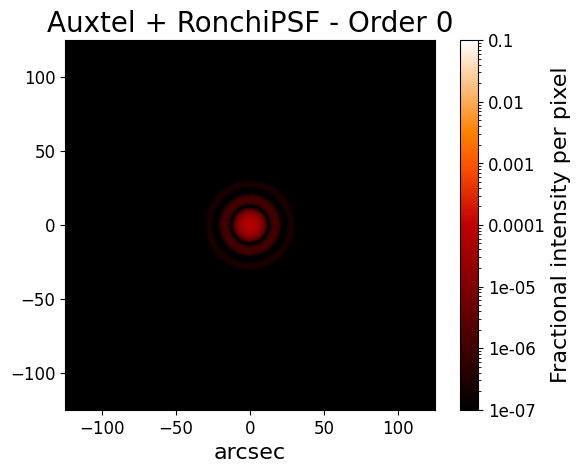

In [26]:
osys = poppy.OpticalSystem("Auxtel + Ronchi - Order 0", oversample=1)
ap= poppy.CircularAperture(radius=beam_radius)
values = ap.sample(npix = Nb) 
#osys.add_pupil(poppy.CircularAperture(radius=D/2))  
osys.add_pupil(ap)  
osys.add_pupil(myoptic)
osys.add_detector(pixelscale=pix_scale, fov_arcsec=50*fov_arcsec)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wl)                            # wavelength in microns
poppy.display_psf(psf, title='Auxtel + RonchiPSF - Order 0') 

In [27]:
poppy.display_profiles?

Signature:
poppy.display_profiles(
    hdulist_or_filename=None,
    ext=0,
    overplot=False,
    title=None,
    **kwargs,
)
Docstring:
Produce two plots of PSF radial profile and encircled energy

See also the display_ee function.

Parameters
----------
HDUlist_or_filename1,2 : fits.HDUlist or string
    FITS files containing image to difference
ext : bool
    FITS extension to use. Default is 0
overplot : bool
    whether to overplot or clear and produce an new plot. Default false
title : string, optional
    Title for plot
File:      ~/MacOSX/GitHub/ASTRO/poppy/poppy/utils.py
Type:      function

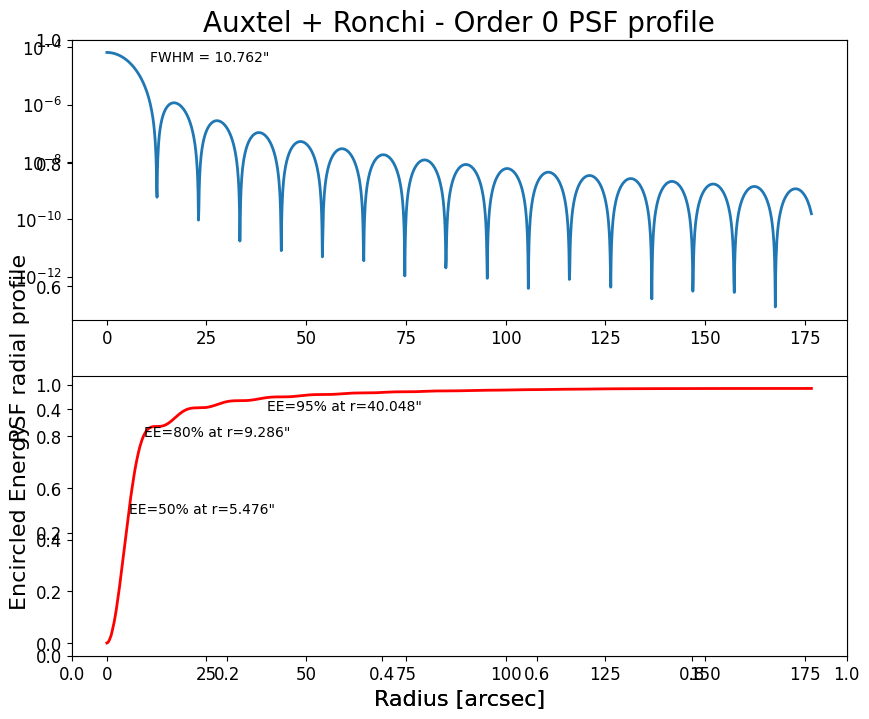

In [28]:
plt.figure(figsize=(10,8))
poppy.display_profiles(psf,title="Auxtel + Ronchi - Order 0 PSF profile")

### Try to find Order 1
By offsetting the detector plane (pixel units)
https://poppy-optics.readthedocs.io/en/latest/api/poppy.Detector.html#poppy.Detector

INFO:poppy:Initialized OpticalSystem: Auxtel + Ronchi- Order 1
INFO:poppy:Computing amplitude for Circle, radius=0.005 m sampled onto 8192 pixel grid with pixelscale 1.8310546875e-06 m / pix
INFO:poppy:Added pupil plane: Circle, radius=0.005 m
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added detector with pixelscale=0.09523809523809523 and oversampling=1: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5e-07 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
INFO:poppy:  Calculation completed in 0.065 s
INFO:poppy:PSF Calculation completed.


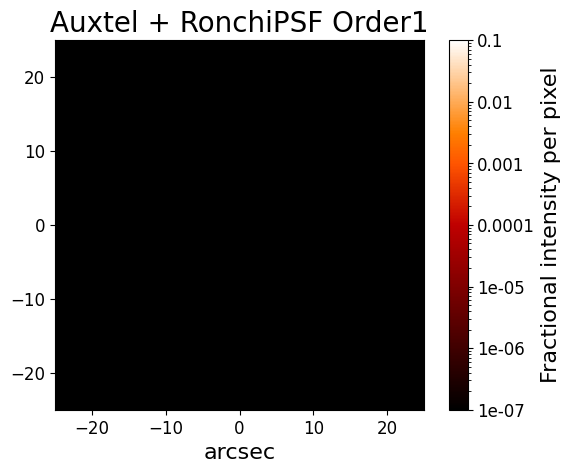

In [29]:
osys = poppy.OpticalSystem("Auxtel + Ronchi- Order 1", oversample=1)
ap= poppy.CircularAperture(radius=beam_radius)
values = ap.sample(npix = Nb) 
osys.add_pupil(ap)  
osys.add_pupil(myoptic)
osys.add_detector(pixelscale=pix_scale, fov_arcsec=10*fov_arcsec, offset = (offset_order1_x,0))  # image plane coordinates in arcseconds
psf = osys.calc_psf(wl)                            # wavelength in microns
poppy.display_psf(psf, title='Auxtel + RonchiPSF Order1',vmax= 0) 

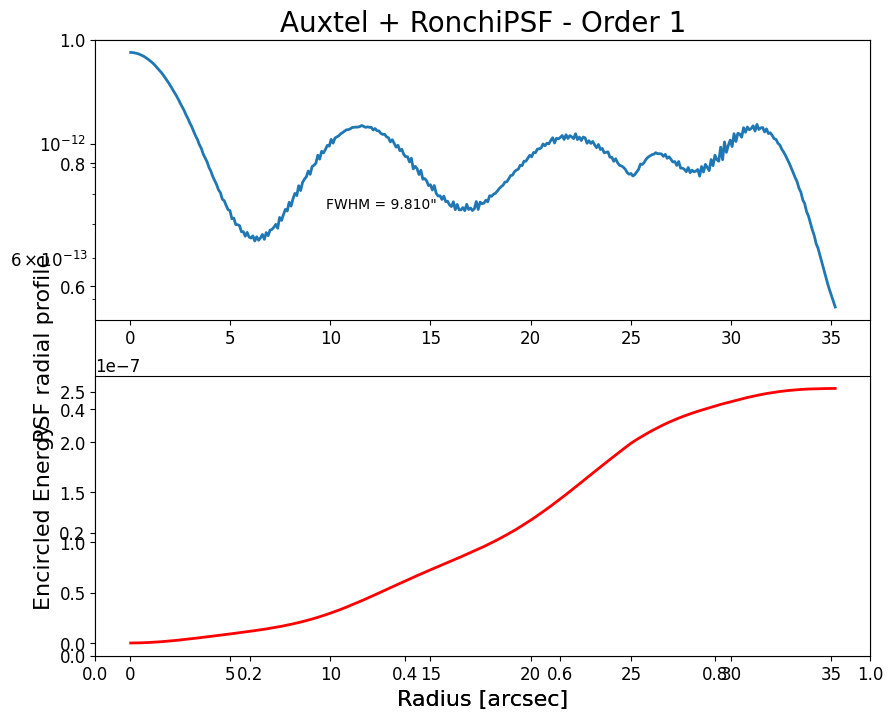

In [30]:
plt.figure(figsize=(10,8))
poppy.display_profiles(psf,title='Auxtel + RonchiPSF - Order 1')